<img src = "https://drive.google.com/uc?export=view&id=1F0W_cKP20hdHzrBOxPSNMLfL6xqLx6et" alt = "Encabezado MLDS" width = "100%">  </img>

# **_Machine Learning_ con _Apache Spark_**
---

En este _notebook_ se busca familiarizar al estudiante con el entorno de ejecución de _Apache Spark_ y sus funciones básicas con ayuda de _PySpark_ su _driver_ oficial para el lenguaje de programación _Python_. 

# **0. Instalar _PySpark_**
---

_PySpark_ es una librería de _Python_ que permite el acceso al motor de _Apache Spark_ desarrollado en el lenguaje de programación _Scala_, que también permite utilizar _Spark_ con el lenguaje _Python_. Este puede ser fácilmente instalado utilizando el gestor de paquetes de _Python_  **`pip`**, como se muestra a continuación. Primero, instalamos y configuramos la variable de entorno de **_Java 8_**:

In [1]:
# Instalamos el OpenJDK 8 con apt-get.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Configuramos la variable de entorno de Java.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Finalmente, utilizamos **`pip`** para instalar _PySpark_ y su librería auxiliar _findspark_.

In [3]:
# Instalamos los paquetes de PySpark.
!pip install -q pyspark
!pip install -q findspark

     |████████████████████████████████| 281.4 MB 45 kB/s 
     |████████████████████████████████| 199 kB 45.1 MB/s 


# **1. Instalar dependencias**
---
Antes de comenzar con la herramienta, vamos a instalar los módulos de *Python* utilizados en esta guía, empezando por **`pyspark`**:


In [4]:
# Importamos pyspark
import pyspark

Además, utilizaremos algunas librerías básicas de análisis y visualización de datos como _Pandas_, _NumPy_ y _Matplotlib_:

In [5]:
# Librerías básicas de análisis de datos.
import numpy as np
import pandas as pd
import matplotlib as mpl

In [6]:
# Versiones de las librerías usadas.
!python --version
print('PySpark', pyspark.__version__)
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)

Python 3.7.15
PySpark 3.3.1
NumPy 1.21.6
Pandas 1.3.5
Matplotlib 3.2.2


Esta actividad se realizó con las siguientes versiones:
*  *Python*: 3.7.10
*  *PySpark*:  3.1.2
*  *NumPy*:  1.19.5
*  *Pandas*: 1.1.5
*  *Matplotlib*:  3.2.2


# **2. Operaciones básicas con _PySpark_**
---
Para comenzar a realizar operaciones con _Apache Spark_ es necesario declarar y almacenar el contexto de *Spark* (objeto **`pyspark.SparkContext`**), el cual es el objeto fundamental que permite la comunicación con el _cluster_. 
> **Nota**: solo puede existir un objeto contexto por máquina virtual, asegúrese de no volver a declarar la variable o de llamar el constructor **`SparkContext`**. 

In [7]:
# Declaramos el contexto de Apache Spark y lo almacenamos en la variable 'sc'.
sc = pyspark.SparkContext()

A diferencia del taller de _Apache Spark_ con _DataBricks_, en un entorno como _Google Colaboratory_ es necesario definir explícitamente objetos como el contexto SQL (**`SQLContext`**). Para realizar esto, vamos a importar los objetos del módulo **`pyspark.sql`**:

In [8]:
# Contexto de Spark para operaciones SQL y en DataFrame.
from pyspark.sql import SQLContext

# Objeto fila de una tabla SQL.
from pyspark.sql import Row

In [9]:
# Creamos el objeto SQLContext.
sqlContext = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


En esta ocasión, para crear un _DataFrame_ de _Spark_ vamos a declarar un objeto resistente a fallos **RDD** (del inglés _resilient distributed dataset_).Para crear un RDD se utiliza el método **`parallelize`** del objeto **`SparkContext`**:



In [10]:
# Construimos un RDD a partir de una lista de valores.
nums = sc.parallelize([1, 2, 3, 4])

A partir de este objeto podemos realizar operaciones como las descritas en la guía anterior. Por ejemplo, podemos tomar los primeros $n$ valores de un RDD con el método **`take`**:

In [11]:
# Tomamos los primeros 3 valores.
nums.take(3)

[1, 2, 3]

También podemos realizar transformaciones como _map_, _filter_, entre otras. Por ejemplo, podemos realizar una operación de _mapeo_ de la siguiente manera:

In [12]:
# Realizando una transformación de mapeo básica en un RDD.
squared = nums.map(lambda x: x * x)

In [ ]:
squared.collect()

[1, 4, 9, 16]

Aunque los RDD son estructuras de datos robustas y flexibles, manejar los datos en _DataFrames_ resulta más conveniente y sencillo en muchos casos. Vamos a crear un RDD y construir un objeto _DataFrame_ con ayuda del objeto de contexto SQL (_SQLContext_).

In [13]:
# Creamos una lista de tuplas. Estas serán interpretadas como clave-valor.
lista_p = [("John", 20), ("Camila", 22), ("Andres", 25), ("Nancy", 18)]

In [14]:
# Creamos un RDD a partir de la lista de tuplas anterior.
ppl_rdd = sc.parallelize(lista_p)

Ahora, vamos a crear el esquema de la tabla, utilizando los nombre **`name`** y **`age`** y utilizando el objeto **`pyspark.sql.Row`** para asignar cada fila de la tabla a construir:

In [15]:
# Creamos el esquema con ayuda del objeto Row.
ppl = ppl_rdd.map(lambda x: Row(name = x[0],  # Nombre de la persona.
                                age= int(x[1]) )) # Edad de la persona.

Finalmente, podemos utilizar el constructor **`sqlContext.createDataFrame`** y utilizar como entrada el RDD construido previamente.

In [16]:
# Creamos un DataFrame a partir del esquema anterior.
DF_ppl = sqlContext.createDataFrame(ppl)

Ahora, podemos realizar operaciones sobre este _DataFrame_, como imprimir su esquema:

In [17]:
# Imprimimos el esquema del DataFrame para comprobar su correcto funcionamiento.
DF_ppl.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



Si intentamos imprimir el _DataFrame_ como en el taller de _Databricks_ nos encontramos con una representación más simple. Para esto, podemos recurrir a la simple representación posible con la función **`show`**.

In [18]:
# Intentamos generar la representación del DataFrame.
display(DF_ppl)

DataFrame[name: string, age: bigint]

In [19]:
# Imprimimos una versión simplificada del DataFrame.
DF_ppl.show()

+------+---+
|  name|age|
+------+---+
|  John| 20|
|Camila| 22|
|Andres| 25|
| Nancy| 18|
+------+---+



Las características de visualización son propias de la plataforma _Databricks_. Si queremos realizar este tipo de operaciones, podemos utilizar el método **`toPandas`** y utilizar las utilidades de visualización de esta librería o de similares como _Seaborn_ y _Matplotlib_.

In [20]:
# Convertimos el DataFrame de Spark en un DataFrame de Pandas.
pd_df = DF_ppl.toPandas().set_index('name')
pd_df

,age
name,
John,20
Camila,22
Andres,25
Nancy,18


Lo visualizamos con las funciones del módulo **`plot`** de _Pandas_:

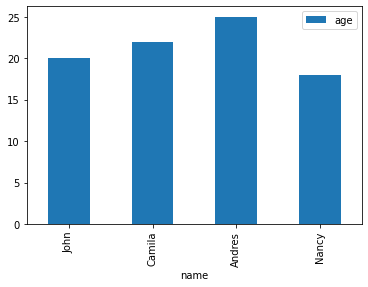

In [21]:
# Utilizamos las utilidades de visualización de Pandas.
pd_df.plot.bar();

# **3. _Machine Learning_ automático con _Apache Spark_**
---

En esta sección realizaremos un ejemplo de aplicación de problemas de aprendizaje automático o _machine learning_ en un contexto _Big Data_ utilizando _Apache Spark_ y sus funcionalidades para el desarrollo y evaluación de modelos.

> **Nota**: esta sección pretende ejemplificar la aplicación de los conceptos discutidos en el Módulo 2, Introducción a _Machine Learning_ con _Python_ con la tecnología presentada en este módulo y es de **carácter opcional**. Si usted no cursó el módulo mencionado o desea realizar un repaso de las ideas discutidas puede consultar los enlaces ubicados en la sección de recursos adicionales para adquirir una noción básica de lo discutido en este material. 

## **3.1. Clasificación con _Apache Spark_**
---
En este primer ejemplo vamos a utilizar el _dataset_ [_Breast Cancer Wisconsin_](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/) del [repositorio de la Universidad de _California, Irvine_](https://archive.ics.uci.edu/ml/datasets.php) que corresponde a un conjunto de datos utilizado en la clasificación de tumores de cáncer de seno y que cuenta con las siguientes columnas, separadas por comas:

  | Variable |  Definición  |            Valores |
  |---|-----------------|----------------------|
  | sample_code |Código numérico de muestreo |            Índice |
  | clump_thickness | Grosor de la masa.|               Número entero (1-10) |
  | unif_cell_size | Uniformidad del tamaño de la célula.|       Número entero (1-10)|
  | unif_cell_shape |Uniformidad de la forma de la célula.|      Número entero (1-10)|
  | marg_adhesion | Adhesión marginal.|             Número entero (1-10)|
  | sgl_epith_cell_size | Tamaño de célula epitelial individual. |   Número entero (1-10)|
  | bare_nuclei | Núcleos desnudos. |                  Número entero (1-10)|
  | bland_chromatin |Cromatina blanda. |              Número entero (1-10)|
  | normal_nucleoli | Nucleólos normales.  |             Número entero (1-10)|
  | mitoses| Mitosis.  |                     Número entero (1-10)|
  | class | Clase o etiqueta del diagnóstico.       |                  (2 para benigno, 4 for maligno)


  Empezaremos por descargar el _dataset_:

In [22]:
# Descargamos el archivo de dataset del repositorio de la UCI.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

--2022-11-28 21:56:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.06s   

2022-11-28 21:56:52 (307 KB/s) - ‘breast-cancer-wisconsin.data’ saved [19889/19889]



Debemos cargar el archivo de nuestro sistema de archivos local al sistema de archivos de _Apache Spark_. Para ello debemos agregarlo como un recurso de _Spark_. 

In [23]:
# Agregamos el archivo de datos como un recurso de Spark
sc.addFile("breast-cancer-wisconsin.data")

Ahora usamos la utilidad **`SparkFiles`** para obtener la ruta absoluta del archivo y cargamos el _dataset_ en un _DataFrame_ con la función **`sqlContext.read.sql`**:

In [24]:
from pyspark import SparkFiles

# Leemos el archivo de datos con ayuda del sqlcontext
# sqlContext.read.csv("breast-cancer-wisconsin.data", header=False, inferSchema=True)
df_cancer = sqlContext.read.csv(SparkFiles.get("breast-cancer-wisconsin.data"), 
                                header=False, 
                                inferSchema=True)

In [25]:
# Verificamos los tipos inferidos imprimiendo el esquema.
df_cancer.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)
 |-- _c9: integer (nullable = true)
 |-- _c10: integer (nullable = true)



Como puede notar, la variable ubicada en la sexta columna (**`bare_nuclei`**) fue identificada como una cadena de caracteres. Empecemos por observar los valores únicos de la columna con el método **`distinct`**:

In [26]:
df_cancer.select("_c6").distinct().show()

+---+
|_c6|
+---+
|  7|
|  3|
|  8|
|  5|
|  6|
|  9|
|  1|
| 10|
|  4|
|  ?|
|  2|
+---+



Para realizar una limpieza apropiada de los datos, debemos filtrar los valores faltantes (expresados con signo de interrogación **`?`**) y dejar únicamente las columnas con valores válidos. Podemos hacer esto con el método **`where`** del objeto **`DataFrame`**:

In [27]:
df_cancer = df_cancer.where(df_cancer["_c6"] != "?")

df_cancer.select("_c6").distinct().show()

+---+
|_c6|
+---+
|  7|
|  3|
|  8|
|  5|
|  6|
|  9|
|  1|
| 10|
|  4|
|  2|
+---+



Ahora, convertimos la columna del tipo de dato **`string`** al tipo **`integer`** con la función **`withColumn`** para reasignar la columna y la función **`cast`** para realizar la conversión de tipos. 

In [28]:
df_cancer = df_cancer.withColumn("_c6", df_cancer["_c6"].cast("int"))
df_cancer.show(10)

+-------+---+---+---+---+---+---+---+---+---+----+
|    _c0|_c1|_c2|_c3|_c4|_c5|_c6|_c7|_c8|_c9|_c10|
+-------+---+---+---+---+---+---+---+---+---+----+
|1000025|  5|  1|  1|  1|  2|  1|  3|  1|  1|   2|
|1002945|  5|  4|  4|  5|  7| 10|  3|  2|  1|   2|
|1015425|  3|  1|  1|  1|  2|  2|  3|  1|  1|   2|
|1016277|  6|  8|  8|  1|  3|  4|  3|  7|  1|   2|
|1017023|  4|  1|  1|  3|  2|  1|  3|  1|  1|   2|
|1017122|  8| 10| 10|  8|  7| 10|  9|  7|  1|   4|
|1018099|  1|  1|  1|  1|  2| 10|  3|  1|  1|   2|
|1018561|  2|  1|  2|  1|  2|  1|  3|  1|  1|   2|
|1033078|  2|  1|  1|  1|  2|  1|  1|  1|  5|   2|
|1033078|  4|  2|  1|  1|  2|  1|  2|  1|  1|   2|
+-------+---+---+---+---+---+---+---+---+---+----+
only showing top 10 rows



In [29]:
df_cancer.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: integer (nullable = true)
 |-- _c2: integer (nullable = true)
 |-- _c3: integer (nullable = true)
 |-- _c4: integer (nullable = true)
 |-- _c5: integer (nullable = true)
 |-- _c6: integer (nullable = true)
 |-- _c7: integer (nullable = true)
 |-- _c8: integer (nullable = true)
 |-- _c9: integer (nullable = true)
 |-- _c10: integer (nullable = true)



Las columnas han sido cargadas con nombres automáticos sin relación con las variables originales. Podemos renombrarlas con el método **`withColumnRenamed`**.

In [30]:
# Lista de nombres de las variables.
target_names = ["sample_code", 
                "clump_thickness", 
                "unif_cell_size", 
                "unif_cell_shape", 
                "marg_adhesion", 
                "sgl_epith_cell_size",
                "bare_nuclei", 
                "bland_chromatin", 
                "normal_nucleoli", 
                "mitoses", 
                "class"]

In [31]:
# Cambiamos los nombres a las columnas
for i in range(0, len(target_names)):
  df_cancer = df_cancer.withColumnRenamed(f"_c{i}", target_names[i])

In [32]:
# Imprimimos el esquema para confirmar el cambio.
df_cancer.printSchema()

root
 |-- sample_code: integer (nullable = true)
 |-- clump_thickness: integer (nullable = true)
 |-- unif_cell_size: integer (nullable = true)
 |-- unif_cell_shape: integer (nullable = true)
 |-- marg_adhesion: integer (nullable = true)
 |-- sgl_epith_cell_size: integer (nullable = true)
 |-- bare_nuclei: integer (nullable = true)
 |-- bland_chromatin: integer (nullable = true)
 |-- normal_nucleoli: integer (nullable = true)
 |-- mitoses: integer (nullable = true)
 |-- class: integer (nullable = true)



In [33]:
# Mostramos la tabla con los nuevos nombres de variables.
df_cancer.show(5, truncate=False)

+-----------+---------------+--------------+---------------+-------------+-------------------+-----------+---------------+---------------+-------+-----+
|sample_code|clump_thickness|unif_cell_size|unif_cell_shape|marg_adhesion|sgl_epith_cell_size|bare_nuclei|bland_chromatin|normal_nucleoli|mitoses|class|
+-----------+---------------+--------------+---------------+-------------+-------------------+-----------+---------------+---------------+-------+-----+
|1000025    |5              |1             |1              |1            |2                  |1          |3              |1              |1      |2    |
|1002945    |5              |4             |4              |5            |7                  |10         |3              |2              |1      |2    |
|1015425    |3              |1             |1              |1            |2                  |2          |3              |1              |1      |2    |
|1016277    |6              |8             |8              |1            |3       

Para verificar que las clases están balanceadas, agruparemos y contaremos los datos en cada grupo, representado por la variable **`class`**:

In [34]:
df_cancer.groupBy("class").count().sort("count", ascending=True).show()

+-----+-----+
|class|count|
+-----+-----+
|    4|  239|
|    2|  444|
+-----+-----+



Podemos realizar un análisis exploratorio de los datos por medios de las medidas estadísticas básicas tales como:
* Conteo (**`count`**).
* Media aritmética (**`mean`**).
* Desviación Estándar (**`stddev`**).
* Mínimo (**`min`**).
* Máximo (**`max`**).

Para esto, utilizamos la función **`describe`**:

In [35]:
df_cancer.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|       sample_code|   clump_thickness|    unif_cell_size|   unif_cell_shape|    marg_adhesion|sgl_epith_cell_size|       bare_nuclei|  bland_chromatin|   normal_nucleoli|           mitoses|             class|
+-------+------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+-----------------+------------------+------------------+------------------+
|  count|               683|               683|               683|               683|              683|                683|               683|              683|               683|               683|               683|
|   mean|1076720.2269399706|  4.44216691068814| 3.150805270863836|3.2152269399707176|2.830161054172767|  3.234260614934114|3.544

In [36]:
# Para obtener la descripción de una o varias columnas puede colocar
# el nombre de las columnas dentro del método describe.
df_cancer.describe("clump_thickness", "unif_cell_size").show()

+-------+------------------+------------------+
|summary|   clump_thickness|    unif_cell_size|
+-------+------------------+------------------+
|  count|               683|               683|
|   mean|  4.44216691068814| 3.150805270863836|
| stddev|2.8207613188371266|3.0651448557860426|
|    min|                 1|                 1|
|    max|                10|                10|
+-------+------------------+------------------+



Podemos realizar tablas de contingencia con el método **`crosstab`**. Esta permite comparar la concentración de valores en dos columnas y puede mostrarnos interesantes relaciones. Exploremos la relación entre la variable **`unif_cell_size`** y el vector de etiquetas **`class`**.

In [37]:
df_cancer.crosstab("unif_cell_size", "class").sort("unif_cell_size_class", ascending=True).toPandas()

,unif_cell_size_class,2,4
0,1,369,4
1,10,0,67
2,2,37,8
3,3,27,25
4,4,8,30
5,5,0,30
6,6,0,25
7,7,1,18
8,8,1,27
9,9,1,5


Ahora, procedemos a realizar el preprocesamiento, y en particular, la selección de las columnas que conformarán las características. En este caso, omitiremos el índice y la variable objetivo:

In [38]:
feature_cols = df_cancer.columns[1:10]
print(feature_cols)

['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'sgl_epith_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses']


Podemos utilizar la función **`pyspark.ml.feature.VectorAssembler`** para convertir dichas columnas en una única variable en formato de vector.

In [39]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = feature_cols, 
                            outputCol = "features")

In [40]:
df = assembler.transform(df_cancer)
df.select('features').show(5)

+--------------------+
|            features|
+--------------------+
|[5.0,1.0,1.0,1.0,...|
|[5.0,4.0,4.0,5.0,...|
|[3.0,1.0,1.0,1.0,...|
|[6.0,8.0,8.0,1.0,...|
|[4.0,1.0,1.0,3.0,...|
+--------------------+
only showing top 5 rows



Ahora, vamos a filtrar los datos y conservar únicamente las columnas **`class`** y **`features`** realizando una selección.

In [41]:
df = df.select("class", "features")
df.show(5)

+-----+--------------------+
|class|            features|
+-----+--------------------+
|    2|[5.0,1.0,1.0,1.0,...|
|    2|[5.0,4.0,4.0,5.0,...|
|    2|[3.0,1.0,1.0,1.0,...|
|    2|[6.0,8.0,8.0,1.0,...|
|    2|[4.0,1.0,1.0,3.0,...|
+-----+--------------------+
only showing top 5 rows



La clase contiene únicamente los valores $2$ y $4$, pero queremos que correspondan a los valores $0$ y $1$. Esta codificación es posible utilizando la clase **`StringIndexer`** del módulo **`pyspark.ml.feature`**. Esta clase se comporta como un transformador (como los disponibles en la librería de _machine learning_ de _Python_: _Scikit-Learn_) y debe pasar por los métodos **`fit`** y **`transform`**, usando el _DataFrame_ como argumento.

In [42]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCol="class", outputCol="label")
indexed = indexer.fit(df)
df = indexed.transform(df).select('label', 'features')

df.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[5.0,1.0,1.0,1.0,...|
|  0.0|[5.0,4.0,4.0,5.0,...|
|  0.0|[3.0,1.0,1.0,1.0,...|
|  0.0|[6.0,8.0,8.0,1.0,...|
|  0.0|[4.0,1.0,1.0,3.0,...|
+-----+--------------------+
only showing top 5 rows



Ahora, utilizaremos el método **`sampleBy`** del objeto **`DataFrame`** para realizar una partición estratificada del conjunto en subconjuntos de entrenamiento (**`train`**) y pruebas (**`test`**) con una proporción de $70\%-30\%$.

In [43]:
# Realizamos el muestreo de la partición de entrenamiento con el 70% de los datos por clase.
train = df.sampleBy("label", fractions={0.0: 0.7, 1.0: 0.7}, seed=42)
train.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[5.0,1.0,1.0,1.0,...|
|  0.0|[5.0,4.0,4.0,5.0,...|
|  0.0|[6.0,8.0,8.0,1.0,...|
|  0.0|[4.0,1.0,1.0,3.0,...|
|  1.0|[8.0,10.0,10.0,8....|
+-----+--------------------+
only showing top 5 rows



In [44]:
# Obtenemos el conjunto de datos que no están en entrenamiento para conformar el conjunto 'test'.
test = df.subtract(train)
test.show(5)

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|[7.0,8.0,7.0,2.0,...|
|  0.0|[1.0,1.0,1.0,2.0,...|
|  1.0|[5.0,10.0,6.0,1.0...|
|  1.0|[10.0,10.0,10.0,6...|
|  1.0|[8.0,8.0,9.0,4.0,...|
+-----+--------------------+
only showing top 5 rows



Verificamos que se encuentre estratificado.

In [45]:
train.groupby("label").count().show()
test.groupby("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|  314|
|  1.0|  189|
+-----+-----+

+-----+-----+
|label|count|
+-----+-----+
|  0.0|   50|
|  1.0|   50|
+-----+-----+



Con nuestro conjunto de entrada preparado, podemos entrenar nuestro modelo de clasificación. *Apache Spark* dispone de una gran variedad de algoritmos de aprendizaje automático en su módulo **`pyspark.ml`**(disponibles en el siguiente [enlace](https://spark.apache.org/docs/latest/ml-classification-regression.html)). En esta ocasión vamos a crear un modelo de clasificador basado en un árbol de decisión:

In [46]:
from pyspark.ml.classification import DecisionTreeClassifier

model = DecisionTreeClassifier(labelCol="label", featuresCol="features")

Podemos entrenar el modelo con el método **`fit`**, ingresando el conjunto de datos de entrenamiento:

In [47]:
model_trained = model.fit(train)

Una vez finalizado el entrenamiento podemos realizar una predicción de los datos con el método **`transform`**, usando como entrada el conjunto de datos de prueba.

In [48]:
y_pred = model_trained.transform(test)
y_pred.show(5)

+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  1.0|[7.0,8.0,7.0,2.0,...|  [1.0,130.0]|[0.00763358778625...|       1.0|
|  0.0|[1.0,1.0,1.0,2.0,...|  [280.0,0.0]|           [1.0,0.0]|       0.0|
|  1.0|[5.0,10.0,6.0,1.0...|    [2.0,0.0]|           [1.0,0.0]|       0.0|
|  1.0|[10.0,10.0,10.0,6...|  [1.0,130.0]|[0.00763358778625...|       1.0|
|  1.0|[8.0,8.0,9.0,4.0,...|  [1.0,130.0]|[0.00763358778625...|       1.0|
+-----+--------------------+-------------+--------------------+----------+
only showing top 5 rows



Finalmente, podemos realizar la evaluación del desempeño de nuestros modelos con las [funciones disponibles](https://spark.apache.org/docs/latest/mllib-evaluation-metrics.html) en el módulo **`pyspark.ml.evaluation`**. En este caso, cargamos la función de evaluación del desempeño para clasificación multiclase para acceder a la métrica $F_1$.

In [49]:
from pyspark.ml.evaluation import  MulticlassClassificationEvaluator

In [50]:
evaluator = MulticlassClassificationEvaluator()

In [51]:
print(f"Métrica '{evaluator.getMetricName()}': {evaluator.evaluate(y_pred):.4f}")

Métrica 'f1': 0.9096


## **3.2. Clasificación de texto (datos no estructurados)**
---

En esta sección vamos a realizar un proceso de clasificación en datos de texto, con el objetivo de ejemplificar el proceso de modelado en datos no estructurados. Para esto, tomaremos el _dataset_  [_Youtube Spam Collection_](https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection) del repositorio de la _UCI_. Este contiene las siguientes características:

  | Variable |  Definición  |            Valores |
  |---|-----------------|----------------------|
  | COMMENT_ID |Identificador del comentario |            Índice |
  | AUTHOR | Nombre de usuario del autor del comentario.|               Cadena de texto |
  | DATA | Fecha de publicación del comentario.| Cadena de texto |
  | CONTENT | Contenido del comentario.| Cadena de texto |
  | CLASS | Clase o etiqueta del diagnóstico.       |                  (0 para comentario normal, 1 para _spam_)


  Como puede notar, las características originales no disponen de tanta información importante para nuestra tarea, a excepción del texto contenido en el comentario. Es por esta razón que es necesario realizar un proceso de extracción de características del texto para su procesamiento con algoritmos de clasificación. 

  Empecemos por descargar el conjunto de datos:

In [52]:
# Descargamos y descomprimimos el conjunto de datos.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00380/YouTube-Spam-Collection-v1.zip
!unzip YouTube-Spam-Collection-v1.zip

--2022-11-28 22:03:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00380/YouTube-Spam-Collection-v1.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163567 (160K) [application/x-httpd-php]
Saving to: ‘YouTube-Spam-Collection-v1.zip’

YouTube-Spam-Collec 100%[===================>] 159.73K   817KB/s    in 0.2s    

2022-11-28 22:03:27 (817 KB/s) - ‘YouTube-Spam-Collection-v1.zip’ saved [163567/163567]

Archive:  YouTube-Spam-Collection-v1.zip
  inflating: Youtube01-Psy.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._Youtube01-Psy.csv  
  inflating: Youtube02-KatyPerry.csv  
  inflating: __MACOSX/._Youtube02-KatyPerry.csv  
  inflating: Youtube03-LMFAO.csv     
  inflating: __MACOSX/._Youtube03-LMFAO.csv  
  inflating: Youtube04-Eminem.csv    
  inflating: __MACOSX/._Youtube04-Eminem.csv  
  infl

Revisamos la colección de archivos en el directorio **`/content`**.

In [53]:
!ls

breast-cancer-wisconsin.data  Youtube03-LMFAO.csv
__MACOSX		      Youtube04-Eminem.csv
sample_data		      Youtube05-Shakira.csv
Youtube01-Psy.csv	      YouTube-Spam-Collection-v1.zip
Youtube02-KatyPerry.csv


Podemos utilizar cualquiera de los conjuntos individuales de manera aislada para nuestro procesamiento. En esta ocasión cargaremos los datos de los comentarios en los videos de Shakira.

In [54]:
# Cargamos el DataFrame a partir del archivo CSV.
df_yt = sqlContext.read.csv("Youtube05-Shakira.csv", header=True, inferSchema=True)
df_yt.show(20)

+--------------------+--------------------+--------------------+--------------------+-----+
|          COMMENT_ID|              AUTHOR|                DATE|             CONTENT|CLASS|
+--------------------+--------------------+--------------------+--------------------+-----+
|z13lgffb5w3ddx1ul...|          dharma pal|2015-05-29 02:30:...|          Nice song﻿|    0|
|z123dbgb0mqjfxbtz...|       Tiza Arellano|2015-05-29 00:14:...|       I love song ﻿|    0|
|z12quxxp2vutflkxv...|Prìñçeśś Âliś Łøv...|2015-05-28 21:00:...|       I love song ﻿|    0|
|z12icv3ysqvlwth2c...|       Eric Gonzalez|2015-05-28 20:47:...|860,000,000 lets ...|    0|
|z133stly3kete3tly...|       Analena López|2015-05-28 17:08:...|shakira is best f...|    0|
|z12myn4rltf4ejddv...| jehoiada wellington|2015-05-28 17:06:...|The best world cu...|    0|
|z135vzqy1yrjhluew...|    Kara Cuthbertson|2015-05-28 15:46:...|             I love﻿|    0|
|z12uujnj2sifvzvav...|       Sudheer Yadav|2015-05-28 10:28:...|SEE SOME MORE SO

In [55]:
# Revisamos el esquema de la tabla.
df_yt.printSchema()

root
 |-- COMMENT_ID: string (nullable = true)
 |-- AUTHOR: string (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- CONTENT: string (nullable = true)
 |-- CLASS: string (nullable = true)



Existen diversos métodos de extracción de características que se escapan del alcance de este material. En particular, _Apache Spark_ dispone de una [amplia colección](https://spark.apache.org/docs/latest/ml-features.html) de algoritmos y funciones para la extracción de características. En esta ocasión consideraremos la extracción basada en el método [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf), discutido en el Módulo 2. 

Para esto, _tokenizaremos_ o dividiremos en palabras el contenido de los comentarios con el objeto **`pyspark.ml.feature.Tokenizer`**:

In [56]:
from pyspark.ml.feature import Tokenizer

df_yt = Tokenizer(inputCol="CONTENT", outputCol="words").transform(df_yt)
df_yt.show(20)

+--------------------+--------------------+--------------------+--------------------+-----+--------------------+
|          COMMENT_ID|              AUTHOR|                DATE|             CONTENT|CLASS|               words|
+--------------------+--------------------+--------------------+--------------------+-----+--------------------+
|z13lgffb5w3ddx1ul...|          dharma pal|2015-05-29 02:30:...|          Nice song﻿|    0|       [nice, song﻿]|
|z123dbgb0mqjfxbtz...|       Tiza Arellano|2015-05-29 00:14:...|       I love song ﻿|    0|  [i, love, song, ﻿]|
|z12quxxp2vutflkxv...|Prìñçeśś Âliś Łøv...|2015-05-28 21:00:...|       I love song ﻿|    0|  [i, love, song, ﻿]|
|z12icv3ysqvlwth2c...|       Eric Gonzalez|2015-05-28 20:47:...|860,000,000 lets ...|    0|[860,000,000, let...|
|z133stly3kete3tly...|       Analena López|2015-05-28 17:08:...|shakira is best f...|    0|[shakira, is, bes...|
|z12myn4rltf4ejddv...| jehoiada wellington|2015-05-28 17:06:...|The best world cu...|    0|[the,

Además, excluiremos del análisis los _tokens_ usados para la puntuación como los puntos y las comas con el objeto **`pyspark.ml.feature.StopWordsRemover`**:

In [57]:
from pyspark.ml.feature import StopWordsRemover

df_yt = StopWordsRemover(inputCol="words", outputCol="filtered_words").transform(df_yt)
df_yt.show(20)

+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+
|          COMMENT_ID|              AUTHOR|                DATE|             CONTENT|CLASS|               words|      filtered_words|
+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+
|z13lgffb5w3ddx1ul...|          dharma pal|2015-05-29 02:30:...|          Nice song﻿|    0|       [nice, song﻿]|       [nice, song﻿]|
|z123dbgb0mqjfxbtz...|       Tiza Arellano|2015-05-29 00:14:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [love, song, ﻿]|
|z12quxxp2vutflkxv...|Prìñçeśś Âliś Łøv...|2015-05-28 21:00:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [love, song, ﻿]|
|z12icv3ysqvlwth2c...|       Eric Gonzalez|2015-05-28 20:47:...|860,000,000 lets ...|    0|[860,000,000, let...|[860,000,000, let...|
|z133stly3kete3tly...|       Analena López|2015-05-28 17:08:..

Ahora, utilizaremos la columna con los _tokens_ filtrados para realizar la extracción con _TF-IDF_. Para esto, deberemos realizar las transformaciones el objeto **`pyspark.ml.feature.HashingTF`** y **`pyspark.ml.feature.IDF`** de manera secuencial:

In [58]:
# TF - Frecuencia de términos.
from pyspark.ml.feature import HashingTF

df_yt = (HashingTF(inputCol="filtered_words", 
                   outputCol="raw_tf", 
                   numFeatures=20)
        .transform(df_yt))

df_yt.show(20)

+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|          COMMENT_ID|              AUTHOR|                DATE|             CONTENT|CLASS|               words|      filtered_words|              raw_tf|
+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+
|z13lgffb5w3ddx1ul...|          dharma pal|2015-05-29 02:30:...|          Nice song﻿|    0|       [nice, song﻿]|       [nice, song﻿]|(20,[10,12],[1.0,...|
|z123dbgb0mqjfxbtz...|       Tiza Arellano|2015-05-29 00:14:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [love, song, ﻿]|(20,[0,10,15],[1....|
|z12quxxp2vutflkxv...|Prìñçeśś Âliś Łøv...|2015-05-28 21:00:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [love, song, ﻿]|(20,[0,10,15],[1....|
|z12icv3ysqvlwth2c...|       Eric Gonzalez|2015-05-28 20:47:...|860,00

In [59]:
# IDF - Frecuencia inversa de documento.
from pyspark.ml.feature import IDF

df_yt = IDF(inputCol="raw_tf", outputCol="tfidf").fit(df_yt).transform(df_yt)
df_yt.show(20)

+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|          COMMENT_ID|              AUTHOR|                DATE|             CONTENT|CLASS|               words|      filtered_words|              raw_tf|               tfidf|
+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+
|z13lgffb5w3ddx1ul...|          dharma pal|2015-05-29 02:30:...|          Nice song﻿|    0|       [nice, song﻿]|       [nice, song﻿]|(20,[10,12],[1.0,...|(20,[10,12],[0.89...|
|z123dbgb0mqjfxbtz...|       Tiza Arellano|2015-05-29 00:14:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [love, song, ﻿]|(20,[0,10,15],[1....|(20,[0,10,15],[0....|
|z12quxxp2vutflkxv...|Prìñçeśś Âliś Łøv...|2015-05-28 21:00:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [lo

Finalmente realizaremos un modelo de clasificación de la misma manera que en la sección anterior con las características extraídas. Antes de proceder, realizamos un conteo de las clases almacenadas en el _dataset_:

In [60]:
df_yt.groupBy("CLASS").count().show()

+--------------------+-----+
|               CLASS|count|
+--------------------+-----+
|                   0|  196|
| Help Rand Protec...|    1|
|                   1|  173|
+--------------------+-----+



Observe que debemos hacer limpieza a la etiqueta  **`CLASS`** y eliminar el dato atípico. Podemos usar el método **`isin`** para limitar los valores a una colección predefinida.

In [61]:
# Filtramos únicamente los valores '0' y '1'.
df_yt = df_yt.where(df_yt["CLASS"].isin(["0", "1"]))

Ahora, transformemos la columna de la clase a **`label`** con el objeto **`StringIndexer`**.

In [62]:
from pyspark.ml.feature import StringIndexer

df_yt = StringIndexer(inputCol="CLASS", outputCol="label").fit(df_yt).transform(df_yt)
df_yt.show(4)

+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+-----+
|          COMMENT_ID|              AUTHOR|                DATE|             CONTENT|CLASS|               words|      filtered_words|              raw_tf|               tfidf|label|
+--------------------+--------------------+--------------------+--------------------+-----+--------------------+--------------------+--------------------+--------------------+-----+
|z13lgffb5w3ddx1ul...|          dharma pal|2015-05-29 02:30:...|          Nice song﻿|    0|       [nice, song﻿]|       [nice, song﻿]|(20,[10,12],[1.0,...|(20,[10,12],[0.89...|  0.0|
|z123dbgb0mqjfxbtz...|       Tiza Arellano|2015-05-29 00:14:...|       I love song ﻿|    0|  [i, love, song, ﻿]|     [love, song, ﻿]|(20,[0,10,15],[1....|(20,[0,10,15],[0....|  0.0|
|z12quxxp2vutflkxv...|Prìñçeśś Âliś Łøv...|2015-05-28 21:00:...|       I love song ﻿|    0

Ahora, realizaremos la partición estratificada del conjunto de datos en entrenamiento (**`train`**) y pruebas (**`test`**), con el $70\%$ de los datos para entrenamiento y el $30\%$ para pruebas.

In [63]:
# Realizamos la particion de los datos.
train = df_yt.sampleBy("label", fractions={0.0: 0.7, 1.0: 0.7}, seed=123)
test = df_yt.subtract(train)

Verificamos que se encuentran estratificados ambos conjuntos.

In [64]:
train.groupby("label").count().show()
test.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|  0.0|  137|
|  1.0|  123|
+-----+-----+

+-----+-----+
|label|count|
+-----+-----+
|  0.0|   58|
|  1.0|   50|
+-----+-----+



Nos quedamos únicamente con las *features* y los *labels* tanto en *train* como en *test*.

In [65]:
train = train.select("label", "tfidf")
train.show(4)
test = test.select("label", "tfidf")
test.show(4)

+-----+--------------------+
|label|               tfidf|
+-----+--------------------+
|  0.0|(20,[10,12],[0.89...|
|  0.0|(20,[0,10,15],[0....|
|  0.0|(20,[3,5,6,7,13,1...|
|  0.0|(20,[3,16,18],[1....|
+-----+--------------------+
only showing top 4 rows

+-----+--------------------+
|label|               tfidf|
+-----+--------------------+
|  1.0|(20,[1,6,14,15],[...|
|  0.0|(20,[2,12,15,19],...|
|  0.0|(20,[2,3,5,7,8,9,...|
|  0.0|(20,[9],[1.271811...|
+-----+--------------------+
only showing top 4 rows



Crearemos un modelo SVC lineal con los siguientes hiperparámetros. Es importante indicarle la columna de las _features_ a usar con el parámetro **`featureCol`**.

In [66]:
from pyspark.ml.classification import LinearSVC
model = LinearSVC(maxIter=100, regParam=0.01, featuresCol="tfidf")

Entrenamos el modelo.

In [67]:
# Entrenamos el modelo SVC.
model_trained = model.fit(train)

Predecimos en _test_ utilizando el modelo entrenado.

In [68]:
# Realizamos una predicción.
y_pred = model_trained.transform(test)
y_pred.show(4)

+-----+--------------------+--------------------+----------+
|label|               tfidf|       rawPrediction|prediction|
+-----+--------------------+--------------------+----------+
|  1.0|(20,[1,6,14,15],[...|[-0.8656460695914...|       1.0|
|  0.0|(20,[2,12,15,19],...|[0.61905995268425...|       0.0|
|  0.0|(20,[2,3,5,7,8,9,...|[-6.2582659602724...|       1.0|
|  0.0|(20,[9],[1.271811...|[1.04972755522370...|       0.0|
+-----+--------------------+--------------------+----------+
only showing top 4 rows



Evaluamos el modelo. Tenga en cuenta que en este caso usaremos una medida de evaluación de problemas de clasificación binarios más apropiada como lo es el área bajo la curva ROC.

In [69]:
from pyspark.ml.evaluation import  BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")

In [70]:
print(f"Métrica '{evaluator.getMetricName()}': {evaluator.evaluate(y_pred)}")

Métrica 'areaUnderROC': 0.9099999999999996


## **Referencias y recursos adicionales**
---

* [_Apache Spark_ - Documentación _SparkSQL_ y DataFrames](https://spark.apache.org/docs/latest/sql-programming-guide.html)
* [_Apache Spark_ - Documentación _MLLib_](https://spark.apache.org/docs/latest/ml-guide.html)
* [Guru99 - PySpark Tutorial for Beginners](https://www.guru99.com/pyspark-tutorial.html)
* [mlcourse.ai - _Open Machine Learning Course_](https://mlcourse.ai)

## **Créditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/)
* **Asistentes docentes:**
  - Leonardo Avendaño Rocha
  - Miguel Ángel Ortiz Marin
  - Alberto Nicolai Romero Martínez  

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*